## *Exploratory Data Analysis - EDA*

In [ ]:
%run C:\Users\Omar\Siteck\Pyhton_Projects\demand_sales_data_Analysi\NoteBooks\2.Data_Cleaning.ipynb

---

### *Descrirptive statistics*

#### *A. categorical & numerical_features:*

In [2]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [3]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 7 numerical features : ['date', 'company', 'quantity', 'price_per_case', 'total_sales', 'month', 'day']
we have 12 categorical features : ['order_id', 'company_region', 'product_id', 'product', 'customer_id', 'product_category01', 'product_category02', 'product_category03', 'unit', 'year', 'month_name', 'day_name']


---

#### *B. Basic data statistics:*


* *Numerical data statistics :*

In [4]:
pd.DataFrame(df[["quantity","price_per_case","total_sales"]].describe())

,quantity,price_per_case,total_sales
count,11338.000000,11338.000000,11338.000000
mean,313.280737,42.528841,13305.313018
std,509.306463,4.656775,21637.964702
min,10.000000,35.000000,360.000000
25%,114.000000,38.000000,4802.000000
50%,227.000000,42.000000,9586.500000
75%,344.000000,47.000000,14800.000000
max,10407.000000,50.000000,364245.000000


* *Categorical data statistics :*

In [5]:
pd.DataFrame(df[["company_region","product","product_category01","product_category02","product_category03","unit"]]).describe()

,company_region,product,product_category01,product_category02,product_category03,unit
count,11338,11338,11338,11338,11338,11338
unique,2,7,3,2,3,2
top,South,AVO32CNV2,32,CNV,2,case
freq,7340,3687,4546,11181,5817,11092


---

#### *C. EDA - Data Visualization:*

* *Numerical features Visualization :*

C:\Users\Omar\AppData\Local\Temp\ipykernel_1496\542076659.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)
C:\Users\Omar\AppData\Local\Temp\ipykernel_1496\542076659.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(232)


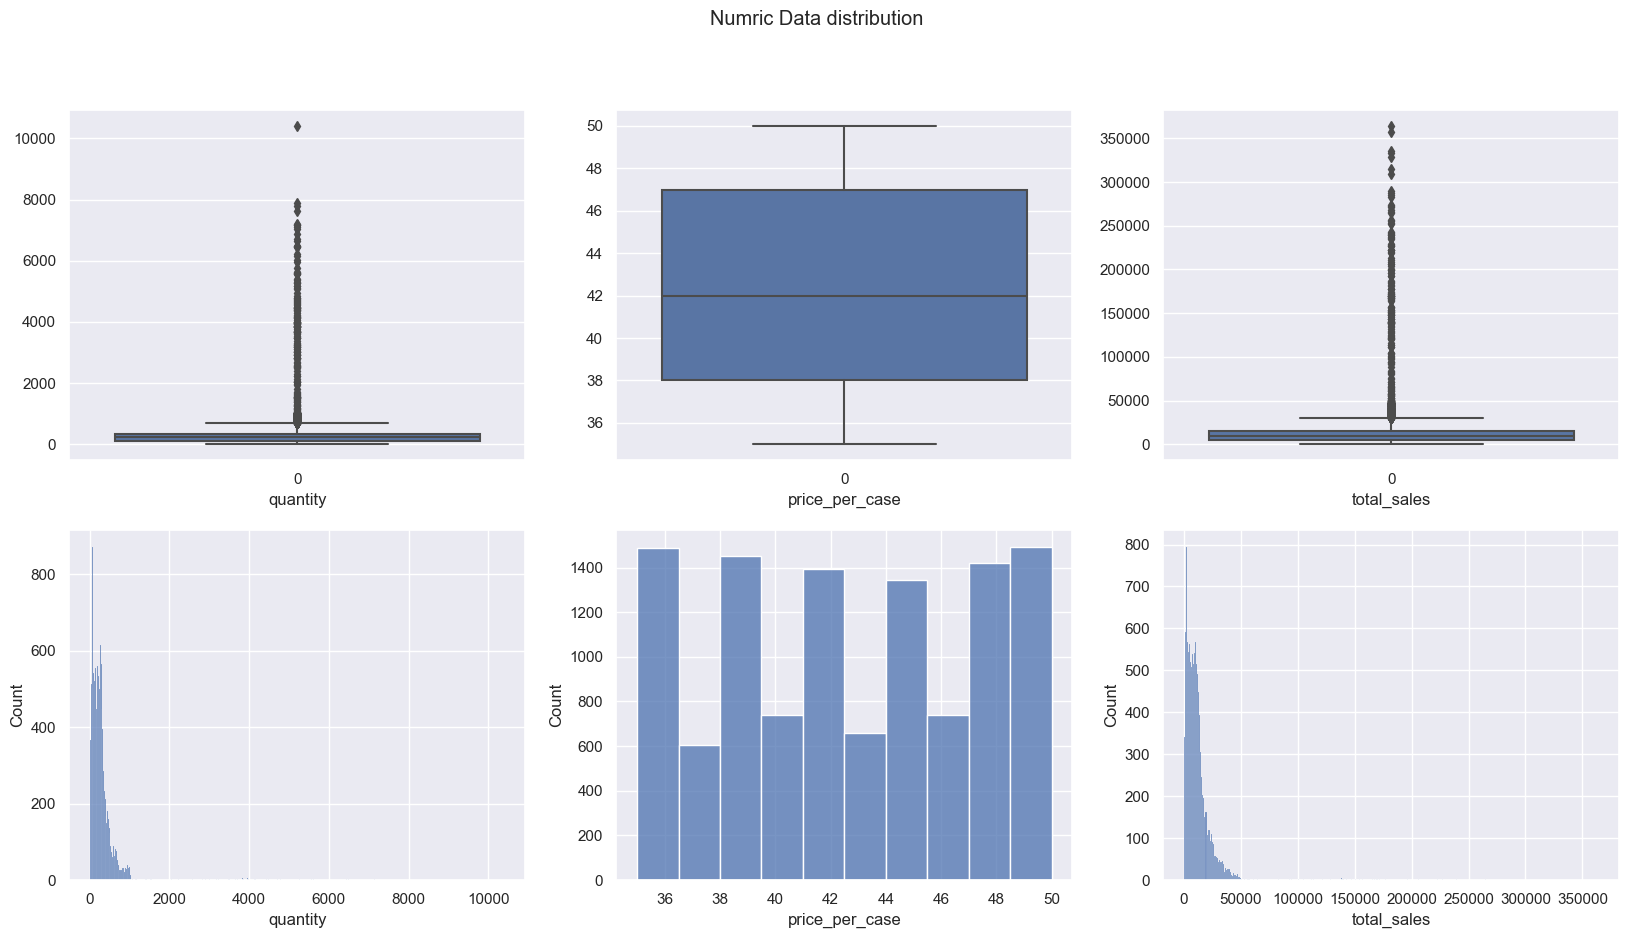

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(231)
sns.boxplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(232)
sns.boxplot(df["price_per_case"])
plt.xlabel("price_per_case");

plt.subplot(233)
sns.boxplot(df["total_sales"])
plt.xlabel("total_sales");


plt.subplot(234)
sns.histplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(235)
sns.histplot(df["price_per_case"],bins=10)
plt.xlabel("price_per_case");

plt.subplot(236)
sns.histplot(df["total_sales"])
plt.xlabel("total_sales");

* *Categorical features Visualization :*

C:\Users\Omar\AppData\Local\Temp\ipykernel_1496\3376363650.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


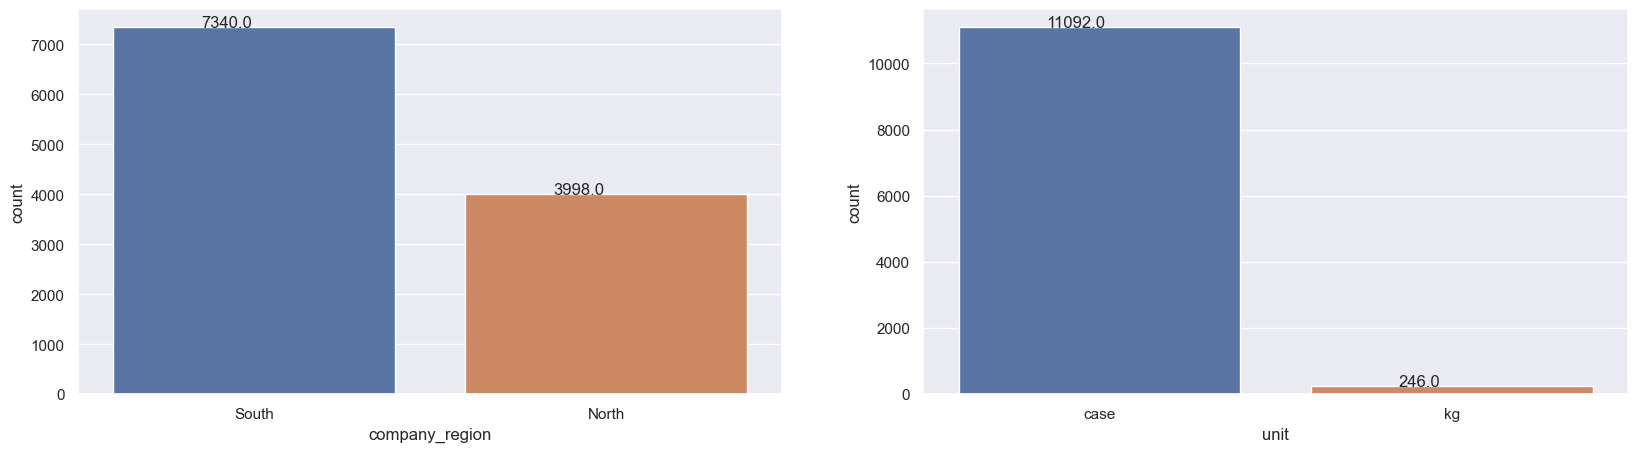

In [7]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
ax=sns.countplot(data=df,x="company_region")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(122)
ax=sns.countplot(data=df,x="unit")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

C:\Users\Omar\AppData\Local\Temp\ipykernel_1496\328981675.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


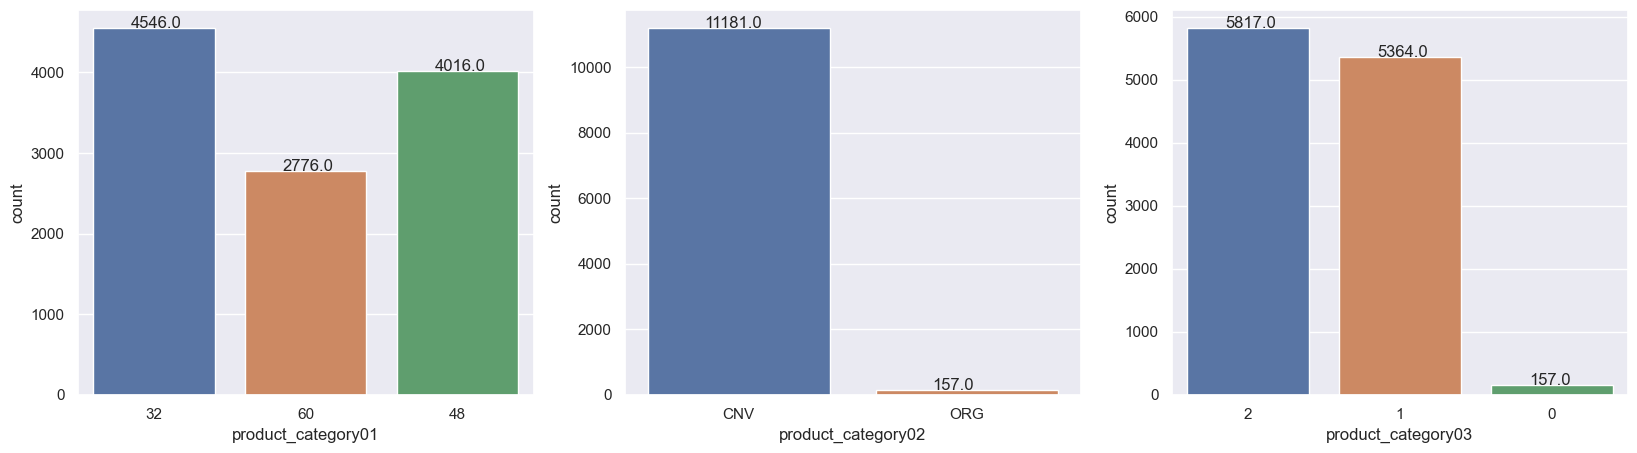

In [8]:
plt.subplots(figsize=(20,5))

plt.subplot(131)
ax=sns.countplot(data=df,x="product_category01")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(132)
ax=sns.countplot(data=df,x="product_category02")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(133)
ax=sns.countplot(data=df,x="product_category03")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

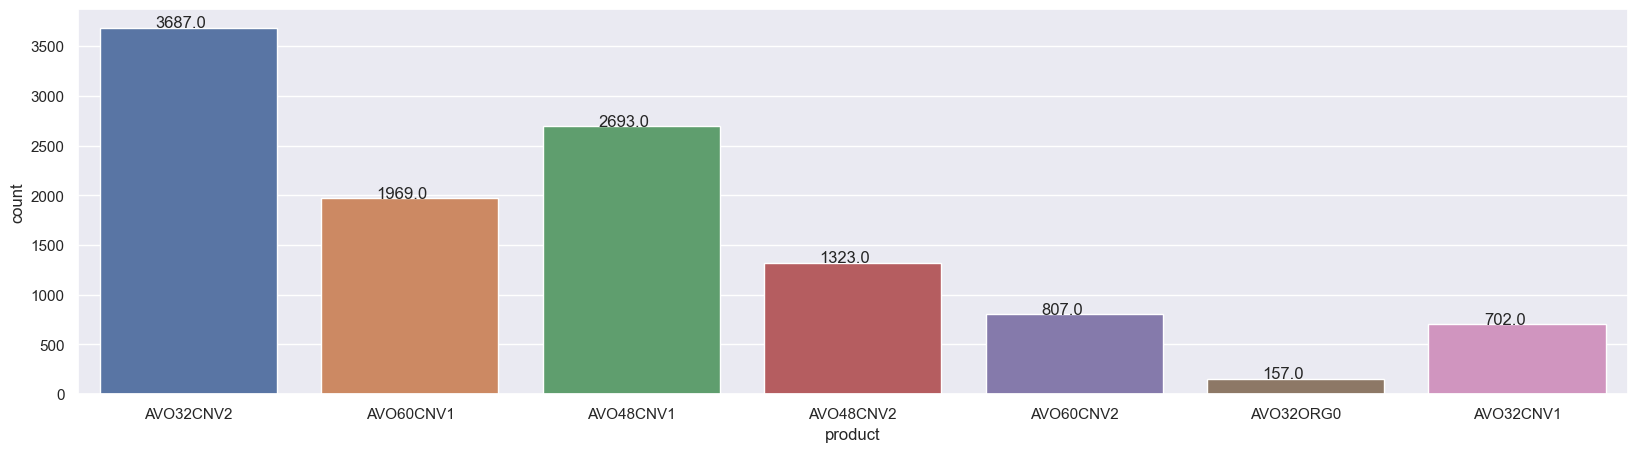

In [9]:
plt.subplots(figsize=(20,5))

ax=sns.countplot(data=df,x="product")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

---

#### *C. EDA Correlation*

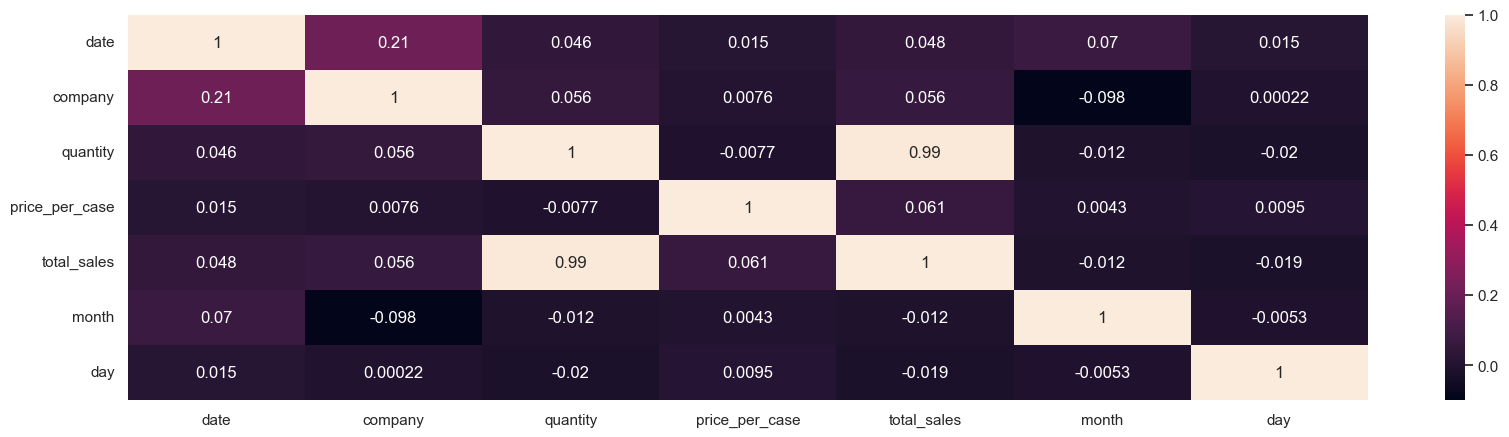

In [10]:
plt.subplots(figsize=(20,5))
sns.heatmap(numerical_features.corr(),annot=True);

---

### *Inferentail statistics*

In [11]:
df_stat=df.copy()

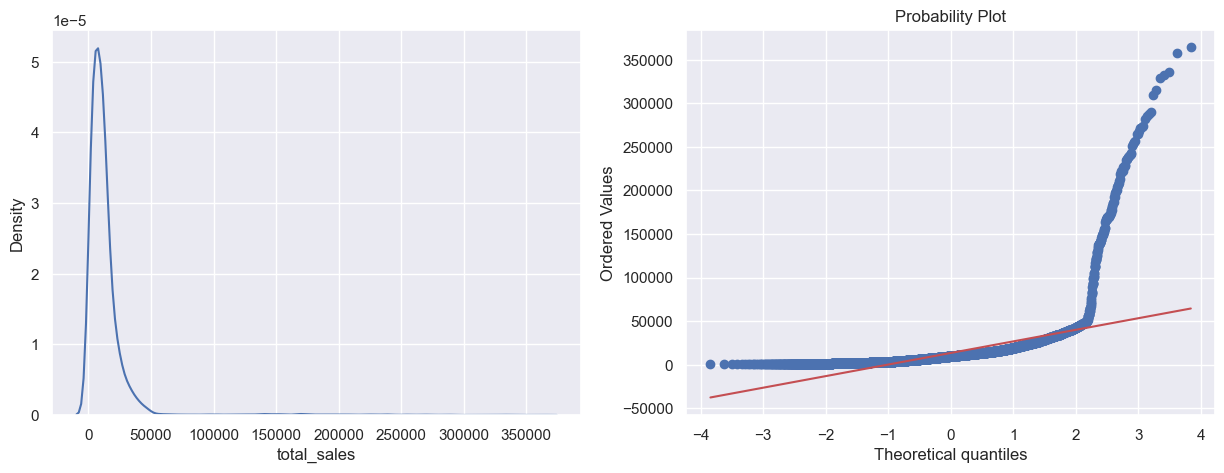

In [12]:
import scipy.stats as stats
import pylab
def normality(data):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

normality(data=df_stat["total_sales"])

In [13]:
from scipy.stats import shapiro
def shapiro_test(data, alpha = 0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print(f'Data looks Gaussian the p value is {p}')
    else:
        print(f'Data look does not look Gaussian the p value is {p}')

shapiro_test(data=df_stat["total_sales"])

Data look does not look Gaussian the p value is 0.0


In [14]:
def convert_to_normality(feature,method):
    if method=="log":normality(np.log(df_stat[feature]))
    elif method=="reciprocal":normality( 1/df_stat[feature])
    elif method=="sqroot":normality(np.sqrt(df_stat[feature]))
    elif method=="exponential": normality(df_stat[feature]**(1/1.2))

df_stat['total_sales_Boxcox'],parameters=stats.boxcox(df_stat['total_sales']) 

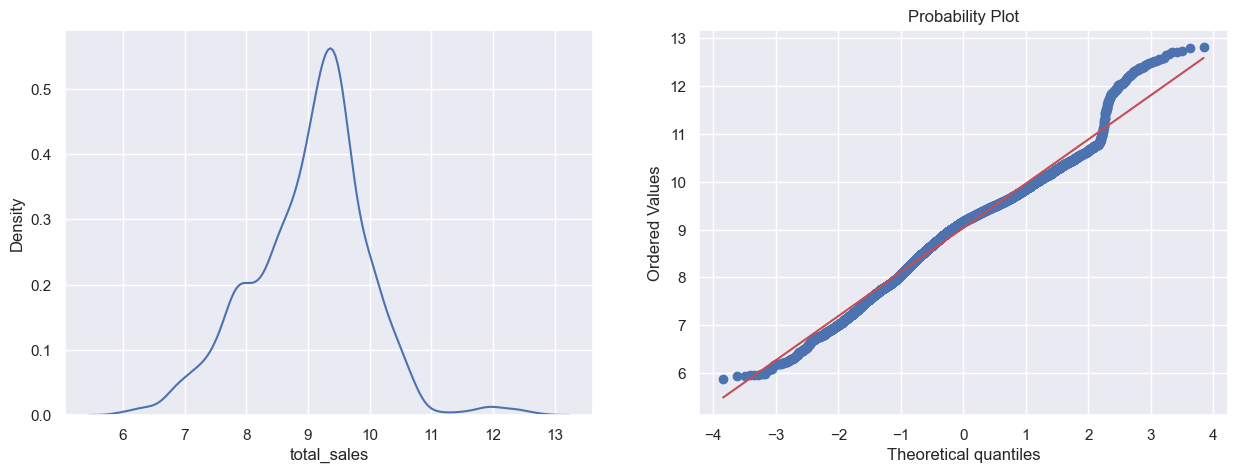

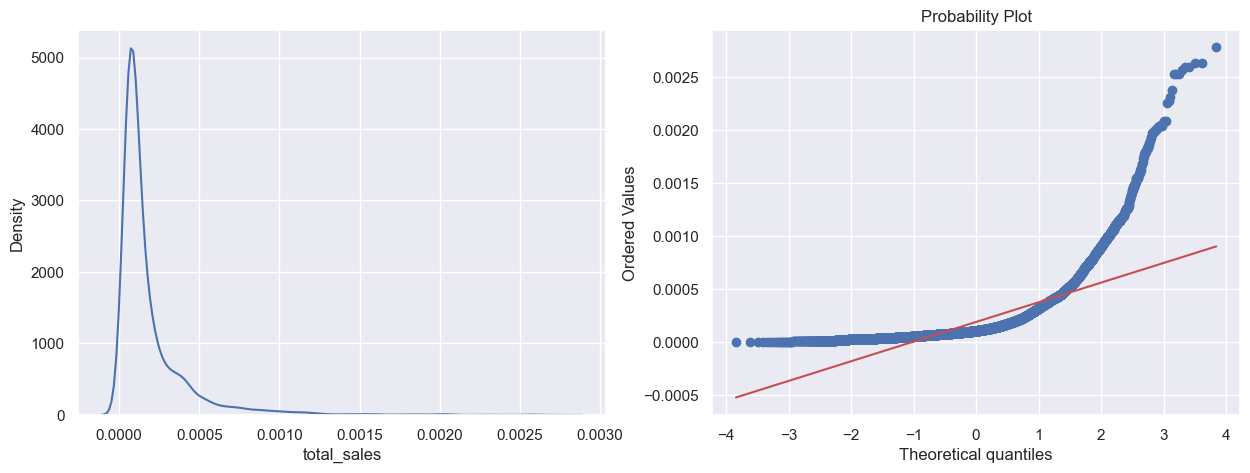

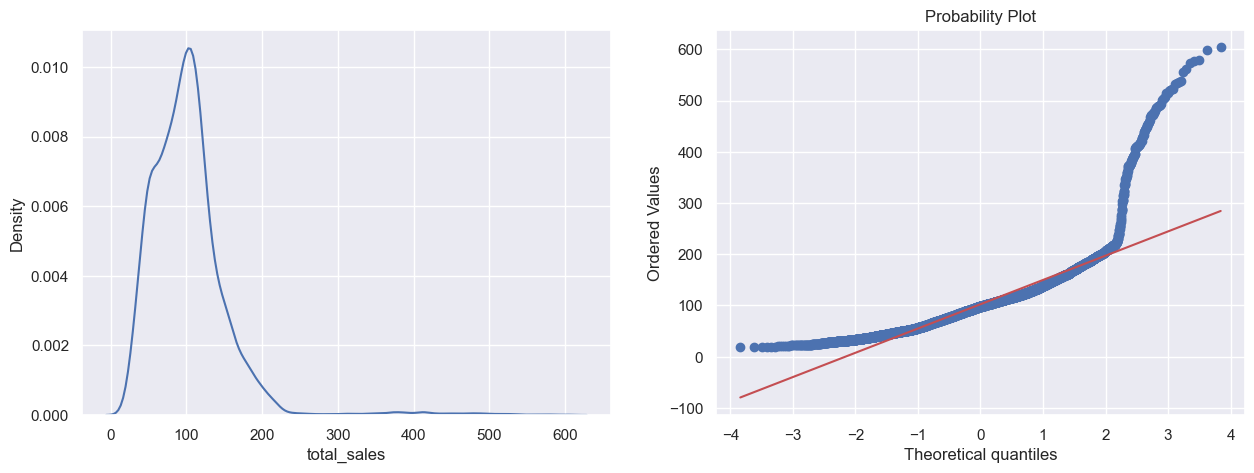

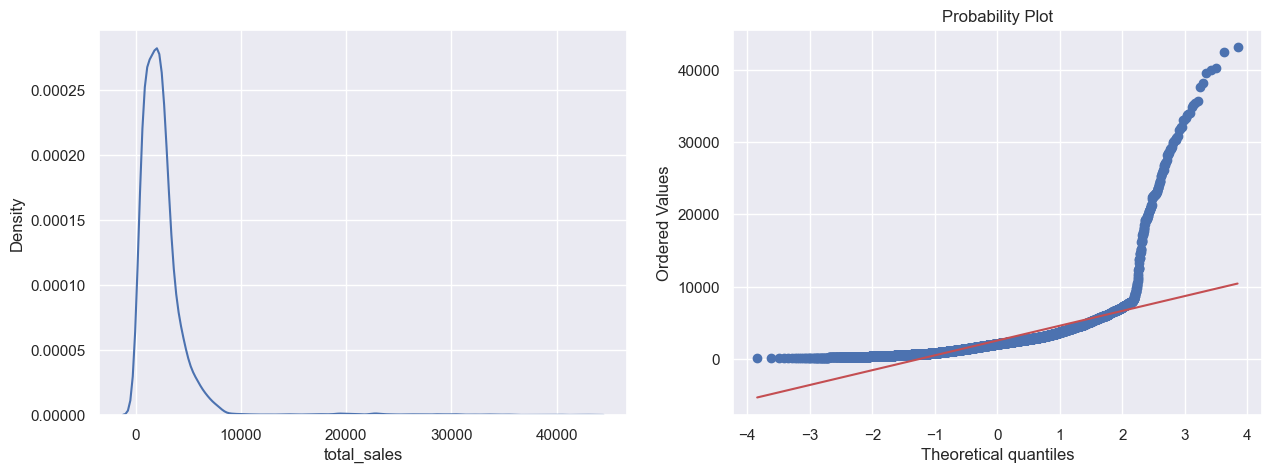

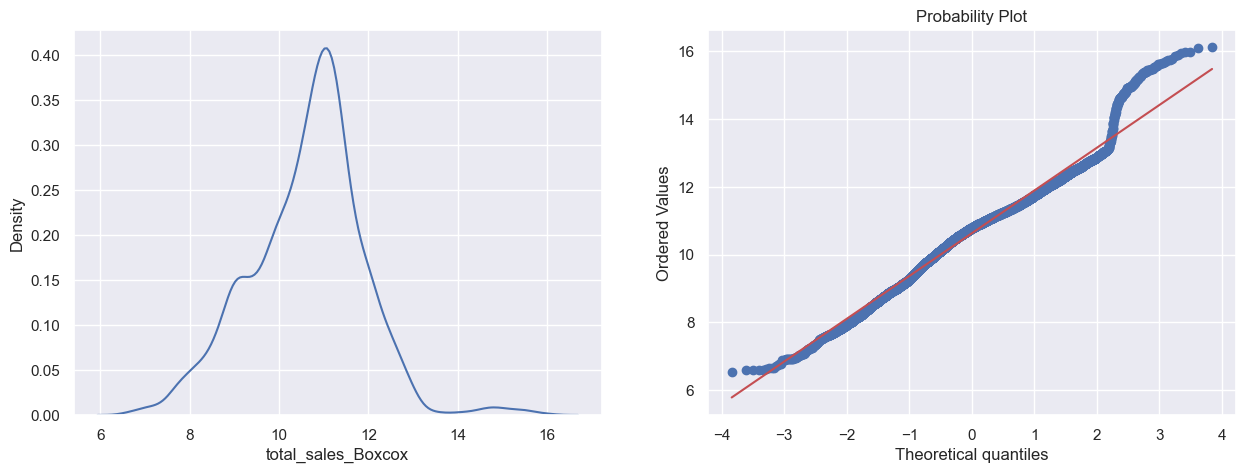

In [15]:
convert_to_normality(feature="total_sales",method="log")
convert_to_normality(feature="total_sales",method="reciprocal")
convert_to_normality(feature="total_sales",method="sqroot")
convert_to_normality(feature="total_sales",method="exponential")
normality(df_stat["total_sales_Boxcox"])

* *From all the transformations discussed above, we can conclude that the Box cox perform the best on the Price variable and transform it to normal distribution*

* *total_sales_Boxcox ~ company*

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Anova_1way=ols("total_sales_Boxcox~company",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq     mean_sq           F        PR(>F)
company       1.0    215.290963  215.290963  134.687609  5.781046e-31
Residual  11336.0  18119.991685    1.598447         NaN           NaN


In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["company"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
121,131,-0.2756,0.0,-0.3222,-0.2291,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between companies*

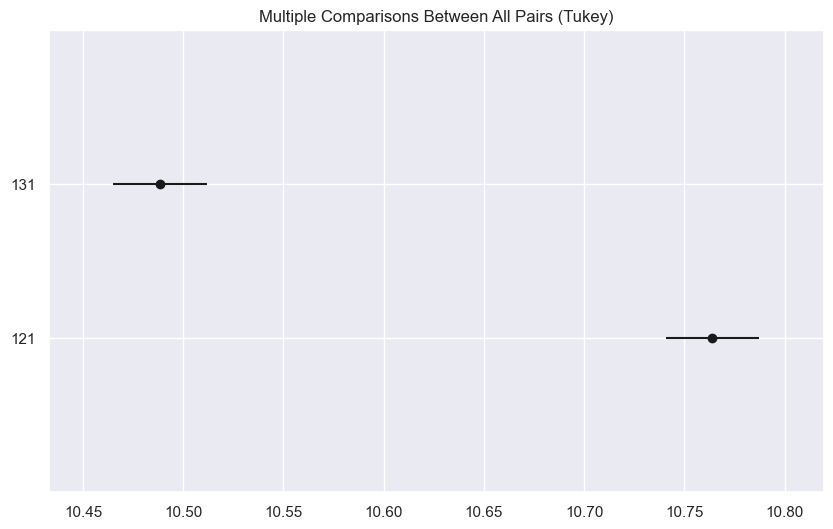

In [18]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ company_region*

In [19]:
Anova_1way=ols("total_sales_Boxcox~company_region",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                     df        sum_sq     mean_sq           F        PR(>F)
company_region      1.0    284.618664  284.618664  178.743407  1.845024e-40
Residual        11336.0  18050.663984    1.592331         NaN           NaN


In [20]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["company_region"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
North,South,-0.3316,0.0,-0.3802,-0.283,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between Regions*

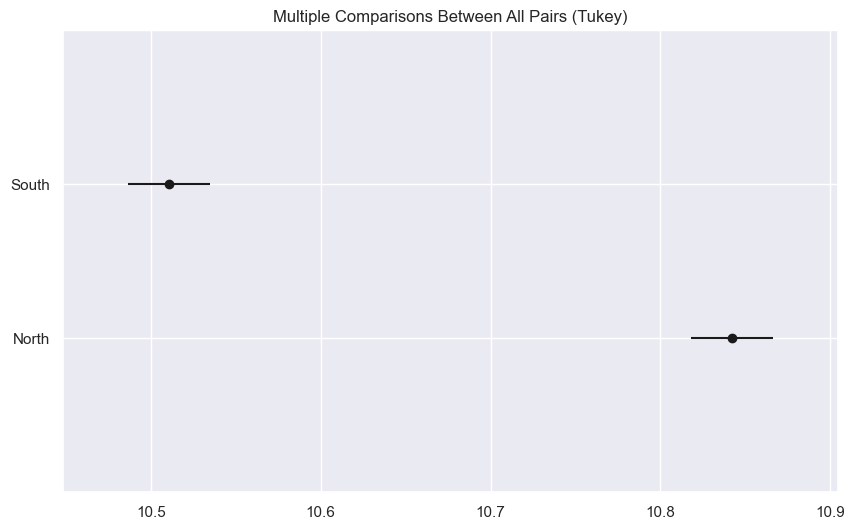

In [21]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_id*

In [22]:
Anova_1way=ols("total_sales_Boxcox~product",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq     mean_sq           F  PR(>F)
product       6.0   3889.579779  648.263296  508.488336     0.0
Residual  11331.0  14445.702870    1.274883         NaN     NaN


In [23]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AVO32CNV1,AVO32CNV2,-0.8223,0.0,-0.9594,-0.6852,True
AVO32CNV1,AVO32ORG0,-0.3376,0.0126,-0.6315,-0.0436,True
AVO32CNV1,AVO48CNV1,0.6647,0.0,0.5236,0.8058,True
AVO32CNV1,AVO48CNV2,-0.3736,0.0,-0.529,-0.2181,True
AVO32CNV1,AVO60CNV1,0.2768,0.0,0.1304,0.4231,True
AVO32CNV1,AVO60CNV2,-0.0943,0.6701,-0.2662,0.0775,False
AVO32CNV2,AVO32ORG0,0.4847,0.0,0.2134,0.756,True
AVO32CNV2,AVO48CNV1,1.487,0.0,1.4026,1.5714,True
AVO32CNV2,AVO48CNV2,0.4487,0.0,0.342,0.5554,True
AVO32CNV2,AVO60CNV1,1.0991,0.0,1.0061,1.192,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between products except between :<br>(AVO32ORG0,AVO60CNV)<br>(AVO32ORG0,AVO48CNV2)<br>(AVO32CNV1,AVO60CNV2)*

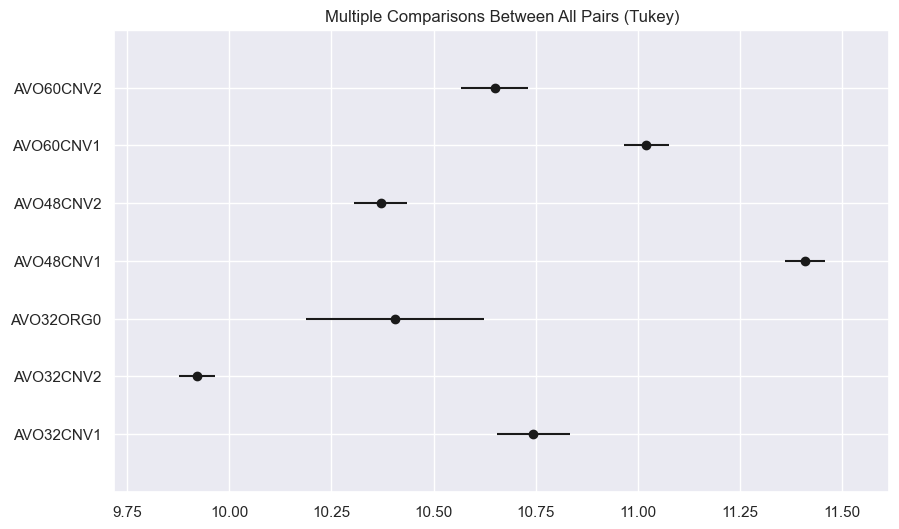

In [24]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_id*

In [25]:
Anova_1way=ols("total_sales_Boxcox~product_category01",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq      mean_sq           F  PR(>F)
product_category01      2.0   2436.736243  1218.368122  868.645617     0.0
Residual            11335.0  15898.546405     1.402607         NaN     NaN


In [26]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category01"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
32,48,1.0012,0.0,0.9411,1.0613,True
32,60,0.8474,0.0,0.7806,0.9143,True
48,60,-0.1538,0.0,-0.2223,-0.0852,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category01*

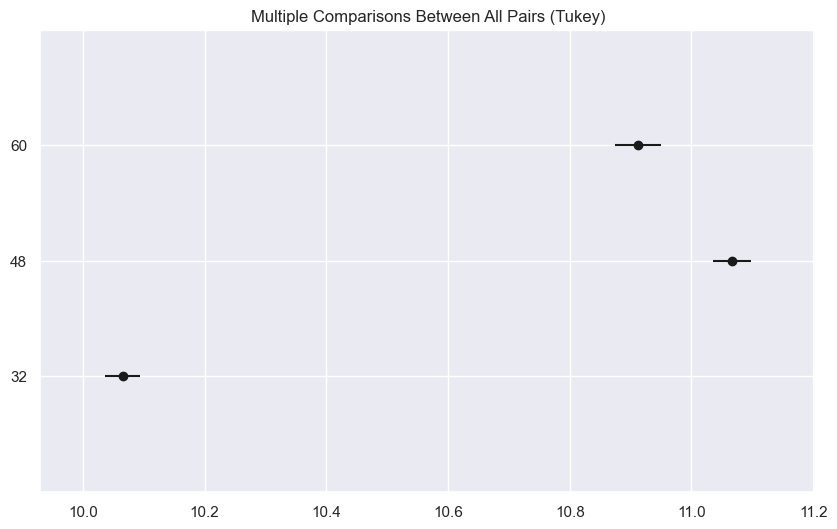

In [27]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_category02*

In [28]:
Anova_1way=ols("total_sales_Boxcox~product_category02",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq   mean_sq         F    PR(>F)
product_category02      1.0      7.786883  7.786883  4.816375  0.028211
Residual            11336.0  18327.495766  1.616752       NaN       NaN


In [29]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category02"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CNV,ORG,-0.2243,0.0282,-0.4246,-0.024,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category02*

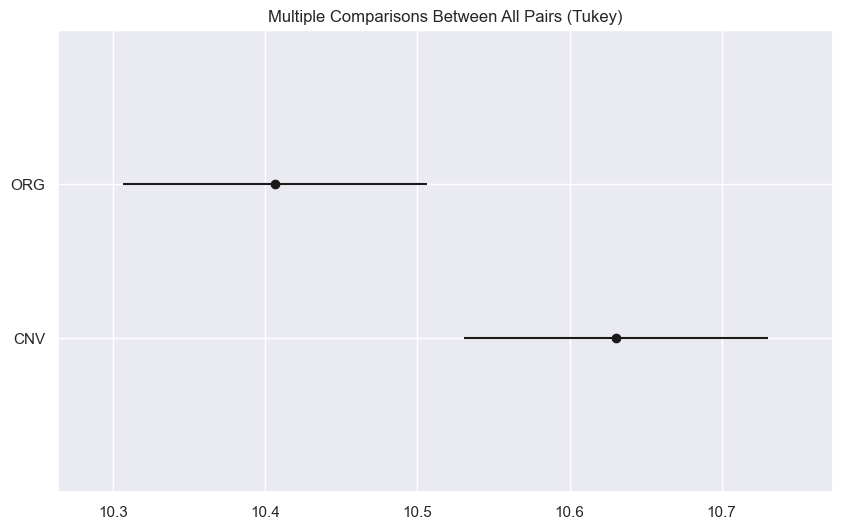

In [30]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_category03*

In [31]:
Anova_1way=ols("total_sales_Boxcox~product_category03",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq      mean_sq            F  PR(>F)
product_category03      2.0   3111.195440  1555.597720  1158.210664     0.0
Residual            11335.0  15224.087208     1.343104          NaN     NaN


In [32]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category03"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.7729,0.0,0.5529,0.9929,True
0,2,-0.2816,0.0075,-0.5014,-0.0619,True
1,2,-1.0545,0.0,-1.106,-1.0031,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category03*

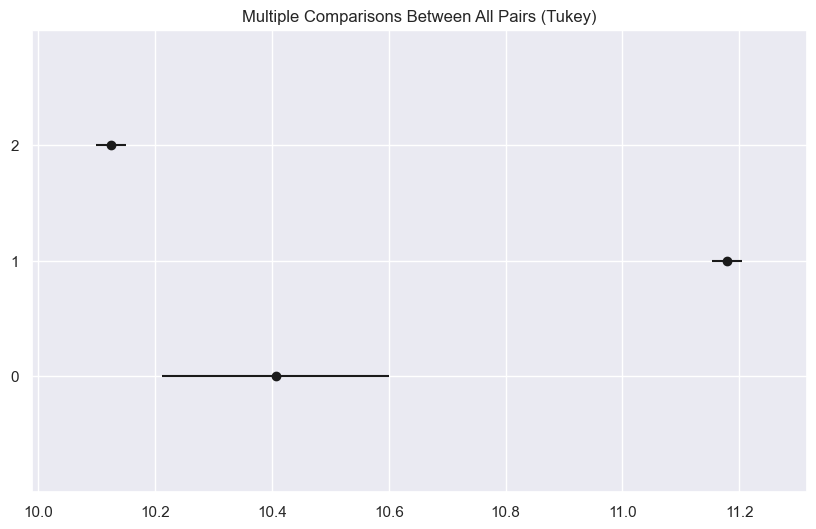

In [33]:
tukey.plot_simultaneous();

* *total_sales_Boxcox~unit*

In [34]:
Anova_1way=ols("total_sales_Boxcox~unit",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq      mean_sq            F  PR(>F)
unit          1.0   2484.966157  2484.966157  1777.224851     0.0
Residual  11336.0  15850.316491     1.398228          NaN     NaN


In [35]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["unit"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
case,kg,3.2133,0.0,3.0639,3.3627,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between units*

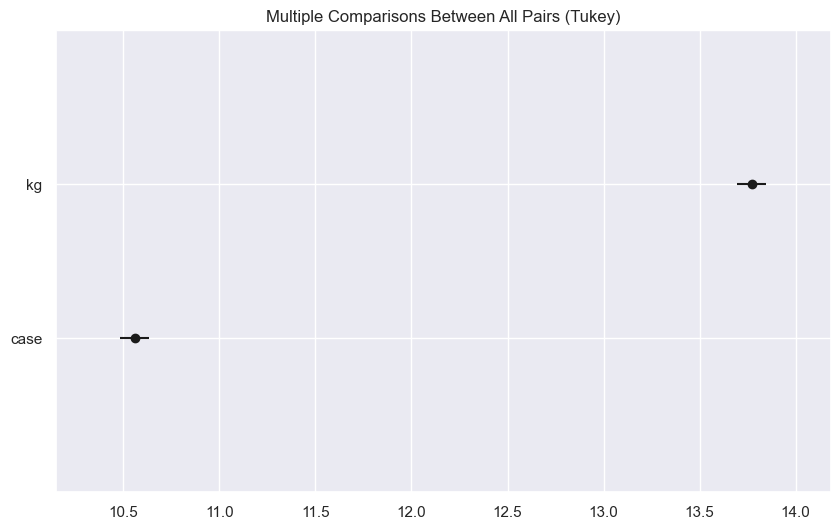

In [36]:
tukey.plot_simultaneous();

* *total_sales_Boxcox~month_name*

In [37]:
Anova_1way=ols("total_sales_Boxcox~month_name",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                 df        sum_sq   mean_sq         F        PR(>F)
month_name     11.0     82.575943  7.506904  4.658114  3.894125e-07
Residual    11326.0  18252.706705  1.611576       NaN           NaN


In [38]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["month_name"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
April,August,0.2689,0.0001,0.084,0.4537,True
April,December,0.1992,0.0663,-0.0059,0.4043,False
April,February,0.1588,0.1681,-0.0247,0.3422,False
April,January,0.0999,0.7932,-0.0771,0.2768,False
April,July,0.1988,0.0155,0.0193,0.3783,True
April,June,0.1988,0.017,0.018,0.3796,True
April,March,0.0712,0.9756,-0.104,0.2464,False
April,May,0.1193,0.5257,-0.0554,0.2941,False
April,November,0.1588,0.2844,-0.0415,0.3591,False
April,October,0.3092,0.0,0.1149,0.5035,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between below months<br>
(April,August)<br>
(April,July)<br>
(April,June)<br>
(April,October)<br>
(April,September)<br>
(August,March)<br>
(January,October)<br>*

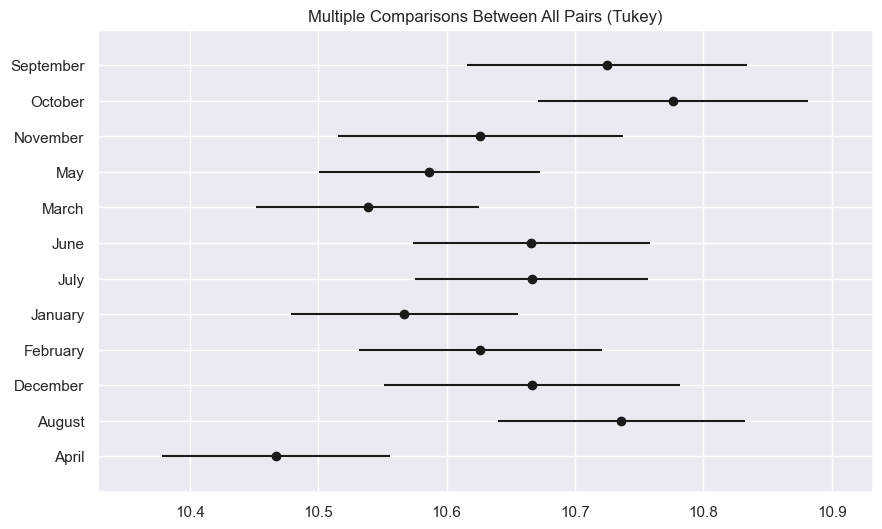

In [39]:
tukey.plot_simultaneous();

---